### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
import seaborn as sns
import pandas_profiling

%matplotlib inline

### Import the data

In [3]:
bicimad = pd.read_csv("bicimad.csv")

### What's in there?

In [4]:
bicimad.head()  # prints first 5 rows

date  year_subs_trips  temp_subs_trips
0  2014-06-23               17               79
1  2014-06-24               24               48
2  2014-06-25              105               14
3  2014-06-26              120               15
4  2014-06-27              131               18

In [5]:
bicimad.tail()  # prints last 5 rows

date  year_subs_trips  temp_subs_trips
2013  2019-12-27             6387                0
2014  2019-12-28             5058                0
2015  2019-12-29             4616                0
2016  2019-12-30             5772                0
2017  2019-12-31             5270                0

In [6]:
bicimad.sample(n=5)  # prints random sample of n rows

date  year_subs_trips  temp_subs_trips
349   2015-06-07             8580              484
1422  2018-05-15             9242              298
1716  2019-03-05            11557              140
1757  2019-04-15             9422              215
1721  2019-03-10             8361              331

In [7]:
bicimad.dtypes  # prints the type of data contained in each column

date               object
year_subs_trips     int64
temp_subs_trips     int64
dtype: object

In [8]:
bicimad.columns  # names of the columns

Index(['date', 'year_subs_trips', 'temp_subs_trips'], dtype='object')

In [9]:
bicimad.describe()

year_subs_trips  temp_subs_trips
count      2018.000000      2018.000000
mean       8483.408325       162.712587
std        3377.176507       131.755530
min          17.000000         0.000000
25%        5874.000000        63.000000
50%        8511.500000       138.000000
75%       11027.500000       222.750000
max       17054.000000       745.000000

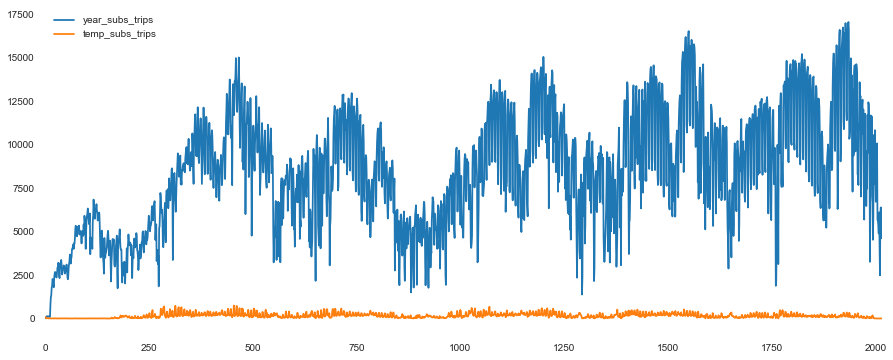

In [10]:
bicimad.plot(figsize=(15, 6))  # uses matplotlib.pyplot to plot 

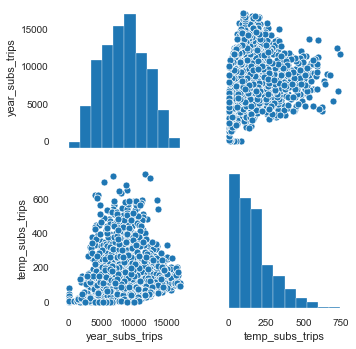

In [11]:
sns.pairplot(bicimad.iloc[:, 1:])  # useful plot from seaborn to get an idea of how the data looks like

### Process data a bit

In [12]:
bicimad["date"] = pd.to_datetime(bicimad["date"])  # convert date from string to date

In [13]:
bicimad.dtypes

date               datetime64[ns]
year_subs_trips             int64
temp_subs_trips             int64
dtype: object

In [14]:
bicimad["year"] = bicimad["date"].dt.date

In [15]:
# create some time related variables

bicimad["year"] = bicimad["date"].map(lambda x: x.year)
bicimad["month"] = bicimad["date"].map(lambda x: x.month)
bicimad["day"] = bicimad["date"].map(lambda x: x.day)
bicimad["weekday"] = bicimad["date"].map(lambda x: x.weekday())
bicimad["weekend"] = np.where(bicimad["weekday"] < 5, 0, 1)

In [16]:
bicimad.dtypes

date               datetime64[ns]
year_subs_trips             int64
temp_subs_trips             int64
year                        int64
month                       int64
day                         int64
weekday                     int64
weekend                     int64
dtype: object

In [17]:
bicimad.head()

date  year_subs_trips  temp_subs_trips  year  month  day  weekday  \
0 2014-06-23               17               79  2014      6   23        0   
1 2014-06-24               24               48  2014      6   24        1   
2 2014-06-25              105               14  2014      6   25        2   
3 2014-06-26              120               15  2014      6   26        3   
4 2014-06-27              131               18  2014      6   27        4   

   weekend  
0        0  
1        0  
2        0  
3        0  
4        0

### Slicing

In [18]:
# trips during weekends

bicimad.query("weekend == True")

date  year_subs_trips  temp_subs_trips  year  month  day  weekday  \
5    2014-06-28              101               18  2014      6   28        5   
6    2014-06-29              107               33  2014      6   29        6   
12   2014-07-05              783                3  2014      7    5        5   
13   2014-07-06             1230                5  2014      7    6        6   
19   2014-07-12             1949                4  2014      7   12        5   
...         ...              ...              ...   ...    ...  ...      ...   
2001 2019-12-15             6714                1  2019     12   15        6   
2007 2019-12-21             5353                0  2019     12   21        5   
2008 2019-12-22             4891                0  2019     12   22        6   
2014 2019-12-28             5058                0  2019     12   28        5   
2015 2019-12-29             4616                0  2019     12   29        6   

      weekend  
5           1  
6           1  
12          1  
13          1  
19          1  
...       ...  
2001        1  
2007        1  
2008        1  
2014        1  
2015        1  

[576 rows x 8 columns]

In [19]:
# trips on Mondays during July 2017
bicimad[
    (bicimad["year"] == 2017) &
    (bicimad["month"] == 7) &
    (bicimad["weekday"] == 0)
]

date  year_subs_trips  temp_subs_trips  year  month  day  weekday  \
1106 2017-07-03            11905              256  2017      7    3        0   
1113 2017-07-10            11684              289  2017      7   10        0   
1120 2017-07-17            11127              193  2017      7   17        0   
1127 2017-07-24            10956              136  2017      7   24        0   
1134 2017-07-31             9759              258  2017      7   31        0   

      weekend  
1106        0  
1113        0  
1120        0  
1127        0  
1134        0

In [20]:
# only year_subs_trips, date, weekend

### Filter the data

Filter:
* between 2015 and 2018
* Monday to Thursday
* summer

In [21]:
# we need a function to extract season from date
def get_season(date_to_convert):
    year = date_to_convert.year
    seasons = [
        ("winter", date(year, 12, 21), date(year, 12, 31)),
        ("summer", date(year, 6, 21), date(year, 9, 20)),
        ("fall", date(year, 9, 21), date(year, 12, 20)),
        ("winter", date(year, 1, 1), date(year, 3, 20)),
        ("spring", date(year, 3, 21), date(year, 6, 20))
    ]
    
    for season in seasons:
        if date_to_convert>=season[1] and date_to_convert<=season[2]:
            return season[0]
        
bicimad["season"] = bicimad["date"].map(get_season)

In [22]:
bicimad.sample(4)  # boom

date  year_subs_trips  temp_subs_trips  year  month  day  weekday  \
1530 2018-08-31            12490              164  2018      8   31        4   
1610 2018-11-19             9875               68  2018     11   19        0   
1268 2017-12-12             9280               35  2017     12   12        1   
1256 2017-11-30            10236               77  2017     11   30        3   

      weekend  season  
1530        0  summer  
1610        0    fall  
1268        0    fall  
1256        0    fall

In [23]:
# now we can work on our filters

year_filter = range(2015, 2019)
weekday_filter = range(4)
season_filter = "summer"

# filter time
bicimad[
    (bicimad["year"].isin(year_filter)) &
    (bicimad["weekday"].isin(weekday_filter)) &
    (bicimad["season"]=="summer") 
]

date  year_subs_trips  temp_subs_trips  year  month  day  weekday  \
364  2015-06-22             9903              183  2015      6   22        0   
365  2015-06-23             9334              148  2015      6   23        1   
366  2015-06-24            11459              179  2015      6   24        2   
367  2015-06-25            12147              182  2015      6   25        3   
371  2015-06-29             9721              141  2015      6   29        0   
...         ...              ...              ...   ...    ...  ...      ...   
1543 2018-09-13            16189              196  2018      9   13        3   
1547 2018-09-17            14316              208  2018      9   17        0   
1548 2018-09-18            15149              120  2018      9   18        1   
1549 2018-09-19            16313              140  2018      9   19        2   
1550 2018-09-20            16529              203  2018      9   20        3   

      weekend  season  
364         0  summer  
365         0  summer  
366         0  summer  
367         0  summer  
371         0  summer  
...       ...     ...  
1543        0  summer  
1547        0  summer  
1548        0  summer  
1549        0  summer  
1550        0  summer  

[211 rows x 9 columns]

### Plots

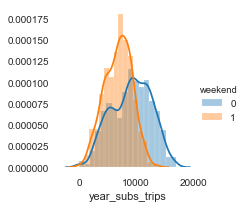

In [24]:
# using seaborn

g = sns.FacetGrid(bicimad, hue="weekend")
g = g.map(sns.distplot, "year_subs_trips")
g.add_legend()